In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib

In [2]:
args = {
    "dataset": "confidential/train150.txt"
}

In [3]:
np.random.seed(8)

In [4]:
dataframe = pd.read_csv(args["dataset"], delimiter="\t", header=None)
dataset = dataframe.values

In [5]:
X = dataset[:-1]
Y = dataset[:, 4][1:]

In [14]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(X_train, X_test, Y_train, Y_test) = train_test_split(
    X, Y, test_size=0.25, random_state=42
)

In [9]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
Y_train = scaler.transform(Y_train.reshape(-1, 1))
Y_test = scaler.transform(Y_test.reshape(-1, 1))

ValueError: non-broadcastable output operand with shape (411,1) doesn't match the broadcast shape (411,9)

In [12]:
print(X_train)
print(Y_train)

[[0.24137931 1.         0.         ... 0.29984501 0.86290415 0.96592513]
 [0.13793103 1.         0.         ... 0.42881246 0.69868716 0.93725968]
 [0.55172414 1.         0.         ... 0.38200805 0.97429453 0.58408147]
 ...
 [0.34482759 1.         0.         ... 0.38976813 0.8171083  0.9729471 ]
 [0.5862069  1.         0.         ... 0.43419635 0.55820861 0.77847358]
 [0.10344828 1.         0.         ... 0.33790358 0.83205758 0.95479812]]
[ 7.37500002 10.74611113  5.53277777  9.70277778  7.06666667  2.73999999
  7.56277779  4.52277778  5.5488889   9.4879518   8.42       12.83833332
  8.70888887  8.04388893  6.43666664  7.3039106   3.06722222  6.58833334
 11.66833335  7.17555555  8.04666673  5.24333337  7.56666668  8.47111113
 10.67943263 10.69388894 12.66055554  3.59999999  5.62277776  5.46888889
  7.90888893  6.98111109  9.96500002  9.13388885  7.95277778 12.96666667
  4.38974369  7.74944446  4.80111111  5.74        4.91722223  8.04111115
 10.84055559  6.11055553  6.38055556  6.05111

In [13]:
# define the 9-9-6-1 architecture using tf.keras
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(9, input_shape=(9,), activation="tanh"))
model.add(tf.keras.layers.Dense(9, activation="tanh"))
model.add(tf.keras.layers.Dense(6, activation="tanh"))
model.add(tf.keras.layers.Dense(1, activation="linear"))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
# initialize our initial learning rate and # of epochs to train for
# INIT_LR = 0.01
EPOCHS = 16

# compile the model using SGD as our optimizer and categorical
# cross-entropy loss (you'll want to use binary_crossentropy
# for 2-class classification)
print("[INFO] training network...")
# opt = tf.keras.optimizers.SGD(lr=INIT_LR)
model.compile(loss="mse", optimizer="sgd", metrics=["mae"])

# train the neural network
H = model.fit(
    X_train,
    Y_train,
    validation_data=(X_test, Y_test),
    epochs=EPOCHS,
    batch_size=1,
)

[INFO] training network...
Train on 411 samples, validate on 138 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/16
411/411 [==============================] - 1s 3ms/sample - loss: 8.2044 - mean_absolute_error: 2.2887 - val_loss: 8.0018 - val_mean_absolute_error: 2.2962
Epoch 2/16
411/411 [==============================] - 1s 2ms/sample - loss: 7.7502 - mean_absolute_error: 2.2679 - val_loss: 7.9411 - val_mean_absolute_error: 2.3017
Epoch 3/16
411/411 [==============================] - 1s 2ms/sample - loss: 7.8197 - mean_absolute_error: 2.2704 - val_loss: 8.1199 - val_mean_absolute_error: 2.2955
Epoch 4/16
411/411 [==============================] - 1s 2ms/sample - loss: 7.7253 - mean_absolute_error: 2.2479 - val_loss: 7.9355 - val_mean_absolute_error: 2.3042
Epoch 5/16
411/411 [==============================] - 1s 2ms/sample - loss: 7.7508 - mean_absolute_error: 2.2663 - val_loss: 7.9414 - val_mean_absolute_error: 2.3016
Epoch 6/16
411/411 [=============================

In [17]:
# evaluate the network
print("[INFO] evaluating network...")
# predictions = model.predict(X_test, batch_size=1)
# print(classification_report(Y_test, predictions, target_names=["velocidade"]))

# evaluate the model
# scores = model.evaluate(X, Y)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

[INFO] evaluating network...


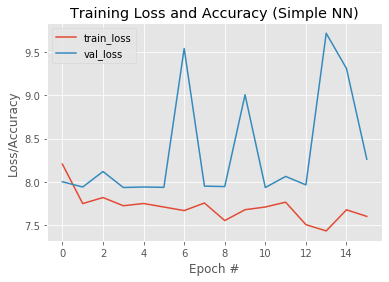

In [20]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
# plt.plot(N, H.history["acc"], label="train_acc")
# plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
# plt.savefig(args["plot"])

# save the model and label binarizer to disk
# print("[INFO] serializing network and label binarizer...")
# model.save(args["model"])
